# Plot Albedo Statistics

## Description

Observed albedo statistics will be plotted as normalized histograms.


( This is a partial clone of the jupyter notebook ${LHOME}/proj/2017-07_icon-nawdex/nbooks/26-low_cloud_albedo_for_low_clouds.ipynb. )


## Libraries

In [1]:
%matplotlib inline

import os, sys, copy, glob
import numpy as np
import datetime
import pylab as pl
import xarray as xr
import pandas as pd

import seaborn as sns
from tropy.standard_config import local_data_path
import tropy.analysis_tools.grid_and_interpolation as gi

In [3]:
import nawdex_analysis.io.collector
import nawdex_analysis.io.input_lev2 as io2

In [2]:
pl.rcParams['figure.figsize'] = (16.0, 8.0)
pl.rcParams['font.size'] = 18.0
pl.rcParams['lines.linewidth'] = 3


## Input Data

In [4]:
fname = '%s/statistics/albedo_statistics_allsets.nc' % io2.nawdex_dir


astats = xr.open_dataset(fname )
astats

<xarray.Dataset>
Dimensions:  (albedo: 99, ct: 9, date: 44)
Coordinates:
  * albedo   (albedo) float64 0.005051 0.01515 0.02525 ... 0.9747 0.9848 0.9949
  * ct       (ct) |S21 'very high opaque' ... 'very low / fractional'
  * date     (date) |S11 '20160921_12' '20160921_13' ... '20161005_15'
Data variables:
    hist     (date, albedo, ct) float64 ...

In [5]:
astats.date
astats['date'] = pd.to_datetime( astats.date, format='%Y%m%d_%H' )

In [6]:
astats = astats.rename({'date' : 'time'})

## Plotting

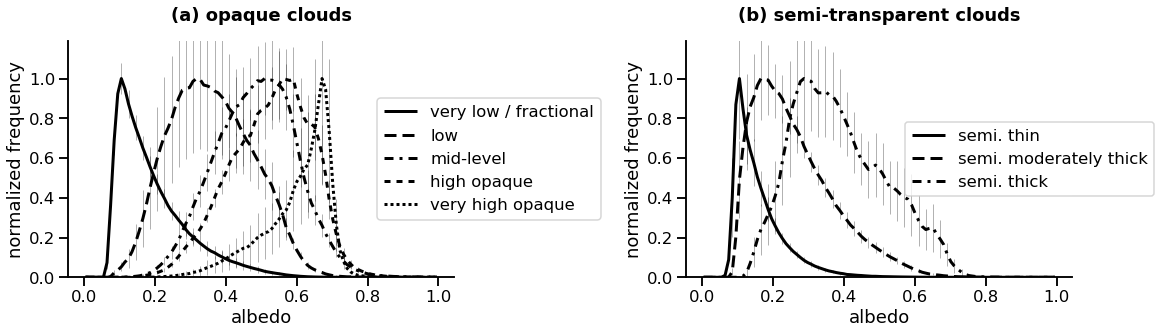

In [9]:
fig, ax = pl.subplots(ncols = 2, figsize = (18, 4.5),)
pl.subplots_adjust( wspace = 0.6, bottom = 0.15)
sns.set_context('talk')

n = 0
i = 0

ctlist = [ 'very low / fractional', 'low', 'middle', 'high opaque', 
                                 'very high opaque', 'semi. thin', 'semi. meanly thick', 
                                 'semi. thick', 
                             ] 

ctnames_list = [ 'very low / fractional', 'low', 'mid-level', 'high opaque', 
                                 'very high opaque', 'semi. thin', 'semi. moderately thick', 
                                 'semi. thick', 
                             ] 

ls = ['-', '--', '--', '--'] * 3
dashes = [[100, 0, 100, 0],  [4, 2, 4, 2], [3,2,1,2], [2,2,2,2], [1,1,1,1]] * 4

daily_mean = astats.groupby('time.day').mean('time')
dvar = daily_mean.std('day')
mvar = astats.mean('time')

for n, cname in enumerate( ctlist ): 
    pl.sca( ax[i] )
    
    ha = mvar.sel(ct = cname)['hist']
    dh = 2 * dvar.sel(ct = cname)['hist'] / np.sqrt( len( daily_mean.day ) )
    
    hrel = ha / ha.max()
    line, = hrel.plot(lw = 3, ls = ls[n], color = 'k', label = ctnames_list[n] )
    line.set_dashes( dashes[n] )
    
    pl.errorbar( astats.albedo, hrel, yerr = (dh / ha.max()), color = 'k', alpha = 0.3, 
                 elinewidth = 1, lw = 0, errorevery = 2, label = None) 
    n += 1
    i = n / 5
    
for i, title in enumerate(['(a) opaque clouds', '(b) semi-transparent clouds']):
    pl.sca( ax[i] )
    pl.title( title, fontweight = 'bold', pad = 20)
    pl.ylabel('normalized frequency')

    pl.legend( loc = 'center right', bbox_to_anchor = (1.4 - i / 6., 0.5))
    pl.ylim(0, 1.19)
sns.despine()
pl.savefig( '../pics/albedo_statistics.png', dpi = 300 )